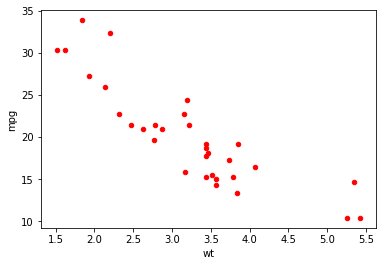

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

mtcars = pd.read_csv(r'C:\Users\kalya\Desktop\Study material\Statistics\titanic ML\mtcars.csv')
mtcars.head(5)
mtcars.plot(kind = 'scatter', x = 'wt', y = 'mpg', color = 'red')

In [10]:
# initialize model

regression_model = linear_model.LinearRegression()

regression_model.fit(X = mtcars[['wt']],y = mtcars.mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
regression_model.coef_

array([-5.34447157])

In [12]:
regression_model.intercept_

37.28512616734204

mpg = 37.28 - 5.345 * wt

In [14]:
# R2 value   -- variation in y explained by x
regression_model.score(X = mtcars[['wt']],y = mtcars.mpg)

0.7528327936582646

In [24]:
# manually deriving R2 value

#get predicted values from the model
predicted_values = regression_model.predict(X = mtcars[['wt']])

residuals = mtcars['mpg'] - predicted_values

#sum of squared residuals
SSresiduals = (residuals ** 2).sum()

#sum of square of difference between y and y-mean
SStotal = ((mtcars.mpg - mtcars.mpg.mean()) **2).sum()

R2 = 1 - (SSresiduals/SStotal)
R2

0.7528327936582646

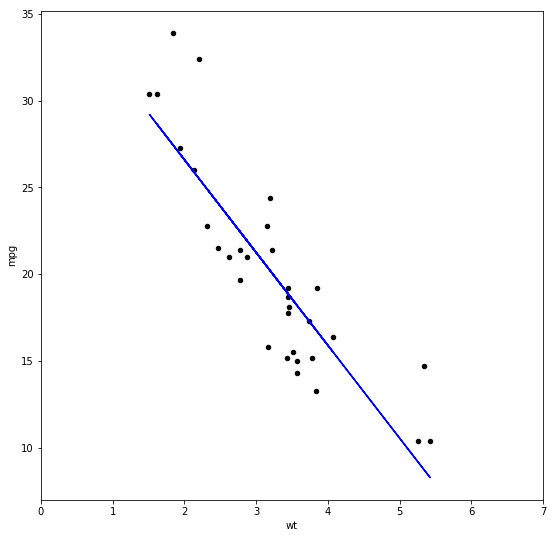

In [38]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

plt.plot(mtcars.wt, predicted_values, color = 'blue')

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line.

QQplot - quantile quantile plot. Is used to compare two probability distributions. If the first distribution is divided into 10 quantiles the other would be divided into same number of quantiles. 
If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x. 

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -8.074143041746

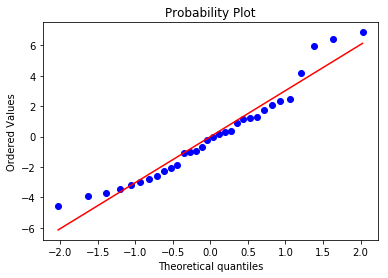

In [47]:
# Here we check if the residuals are normally distributed by comparing residuals to normal distribution. 
#The plot is not a straight line. Hence residuals are not normally distributed. This is an indication that 
#simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

stats.probplot(residuals, plot = plt, dist = 'norm', fit = True)

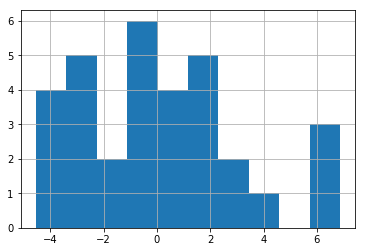

In [48]:
residuals.hist()  # residuals (error variables) are not normally distributed

In [54]:
# RMSE - root mean of SSE -- variation in y unexplained by x
(np.mean(residuals ** 2)) ** 0.5

2.949162685955028

In [56]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(mtcars['mpg'], predicted_values) ** 0.5

RMSE

2.949162685955028

# Polynomial regression


In [59]:
poly_model = linear_model.LinearRegression()

In [68]:
predictors = pd.DataFrame ([mtcars['wt'], mtcars['wt']**2]).T

In [70]:
predictors.head()

,wt,wt
0,2.620,6.864400
1,2.875,8.265625
2,2.320,5.382400
3,3.215,10.336225
4,3.440,11.833600


In [71]:
poly_model.fit(X = predictors, y = mtcars['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
poly_model.coef_ # coeff of wt and wt**2

array([-13.38033708,   1.17108689])

In [74]:
poly_model.intercept_

49.93081094945181

In [101]:
xvalues = np.arange(mtcars['wt'].min(), mtcars['wt'].max(), 0.1)

In [109]:
yvalues = poly_model.predict(pd.DataFrame([xvalues, xvalues**2]).T)

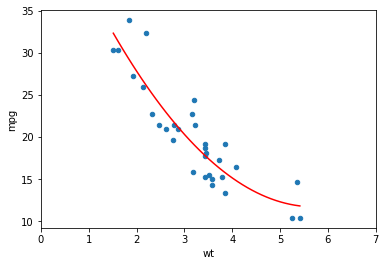

In [110]:
mtcars.plot(kind = 'scatter', x = 'wt', y = 'mpg', xlim = (0,7))
plt.plot(xvalues, yvalues, color = 'red')

In [72]:
poly_model.score(X = predictors, y = mtcars['mpg']) # model accuracy

0.8190613581384095

The polynomial model has higher R square value than linear model. 

In [113]:
rmse = mean_squared_error(mtcars['mpg'], poly_model.predict(X = predictors)) ** 0.5
rmse

2.5233004724610786

# Multiple Linear Regression

In [118]:
multi_model = linear_model.LinearRegression()

X = mtcars.loc[:,['wt','hp']]
y = mtcars['mpg']

multi_model.fit(X = X, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print('coeff: wt, hp\t',multi_model.coef_)

print('intercept\t',multi_model.intercept_)

R2 = multi_model.score(X = X, y = y)
print('R2\t',R2)

coeff wt, hp	 [-3.87783074 -0.03177295]
intercept	 37.22727011644721
R2	 0.8267854518827915


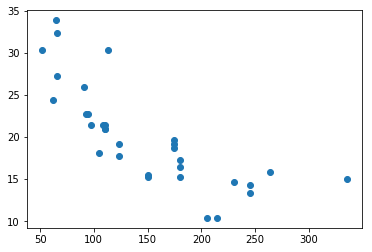

In [141]:
plt.scatter(mtcars['hp'],y)

The relationship between hp and mpg seems to be cuved than a linear one. So we try polynomial moedl

In [142]:
multi_reg_model = linear_model.LinearRegression()

In [159]:
X = pd.DataFrame([mtcars['wt'],mtcars['hp'],mtcars['wt']**2,mtcars['hp']**2]).T

In [161]:
X.head()

,wt,hp,wt,hp
0,2.620,110.0,6.864400,12100.0
1,2.875,110.0,8.265625,12100.0
2,2.320,93.0,5.382400,8649.0
3,3.215,110.0,10.336225,12100.0
4,3.440,175.0,11.833600,30625.0


In [162]:
y = mtcars['mpg']

In [163]:
multi_reg_model.fit(X = X, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
print('coeff: wt, hp\t',multi_reg_model.coef_)

print('intercept\t',multi_reg_model.intercept_)

R2 = multi_reg_model.score(X = X, y = y)
print('R2\t',R2)

coeff: wt, hp	 [-9.22032201e+00 -9.42795055e-02  8.50005416e-01  1.74322164e-04]
intercept	 49.45304935318308
R2	 0.8907279549670641


In [168]:
rmse = mean_squared_error(multi_reg_model.predict(X),y)**0.5
rmse

1.9609108134176982

In [172]:
multi_reg_model.score(X = X, y = y)

0.8907279549670641

The score(R2 value) is high and the rmse is lower fo this model. 

We could continue adding more explanatory variables in an attempt to improve the model. Adding variables that have little relationship with the response or including variables that are too closely related to one another can hurt your results when using linear regression. You should also be wary of numeric variables that take on few unique values since they can act more like categorical variables than numeric ones.